In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 1 [5.0 puntos]

Dados los valores de los precios de tres activos en el fichero en la ruta `filepath`, analiza cuál sería el activo en el que invertirías y añade la justificación de la decisión.

In [97]:
filepath = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/datos_practicas/datos_ejercicio1.csv"

precios = pd.read_csv(filepath, index_col=0)
precios.head()

,Activo 1,Activo 2,Activo 3
0,1.007512,1.172625,0.935687
1,1.034282,1.045326,0.884819
2,1.097240,1.068054,0.933041
3,1.070608,0.978501,0.977994
4,1.133475,0.866147,0.939886


In [98]:
retornos = np.log(precios).diff().dropna()
retornos.head()

,Activo 1,Activo 2,Activo 3
1,0.026224,-0.114917,-0.055898
2,0.059091,0.021510,0.053066
3,-0.024571,-0.087572,0.047055
4,0.057061,-0.121967,-0.039745
5,-0.004751,0.040719,-0.028798


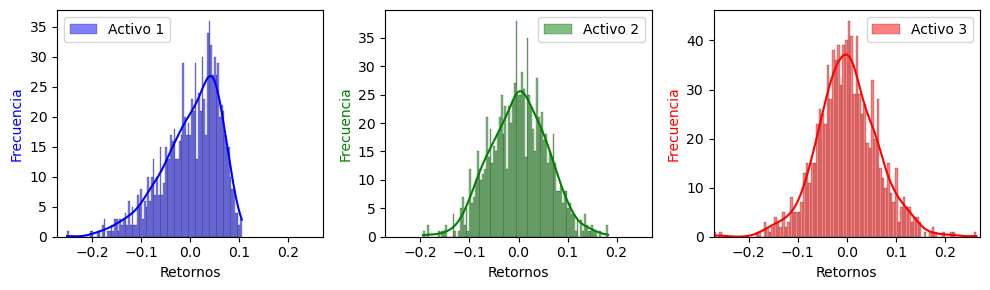

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
vmax = np.abs(retornos).max().max()

# Gráfico para 'Activo 1'
sns.histplot(data=retornos, x='Activo 1', bins=100, color='blue', kde=True, alpha=0.5, label='Activo 1', ax=axes[0])
axes[0].set_xlabel('Retornos')
axes[0].set_ylabel('Frecuencia', color='blue')
axes[0].legend()
axes[0].set_xlim(-vmax, vmax)

# Gráfico para 'Activo 2'
sns.histplot(data=retornos, x='Activo 2', bins=100, color='green', kde=True, alpha=0.5, label='Activo 2', ax=axes[1])
axes[1].set_xlabel('Retornos')
axes[1].set_ylabel('Frecuencia', color='green')
axes[1].legend()
axes[1].set_xlim(-vmax, vmax)

# Gráfico para 'Activo 3'
sns.histplot(data=retornos, x='Activo 3', bins=100, color='red', kde=True, alpha=0.5, label='Activo 3', ax=axes[2])
axes[2].set_xlabel('Retornos')
axes[2].set_ylabel('Frecuencia', color='red')
axes[2].legend()
axes[2].set_xlim(-vmax, vmax)

plt.tight_layout()
plt.show()

In [100]:
retornos.mean() * 252

Activo 1    0.250364
Activo 2    0.212082
Activo 3    0.269021
dtype: float64

In [101]:
retornos.std() * np.sqrt(252)

Activo 1    0.942591
Activo 2    0.929752
Activo 3    0.995969
dtype: float64

In [102]:
retornos.skew()

Activo 1   -0.845692
Activo 2   -0.018823
Activo 3    0.030535
dtype: float64

In [103]:
retornos.kurtosis()

Activo 1    0.447310
Activo 2   -0.004204
Activo 3    1.022480
dtype: float64

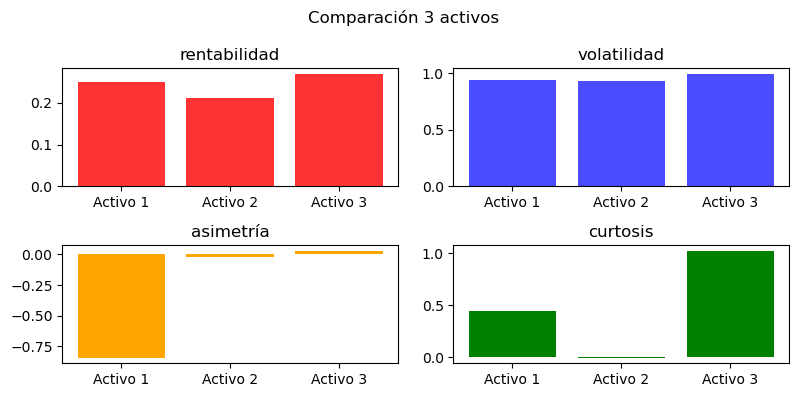

In [104]:
fig, ax = plt.subplots(2,2,figsize=(8,4))

ax[0, 0].bar(retornos.columns, retornos.mean() * 252, color='red', alpha=0.8)
ax[0, 0].set_title('rentabilidad')

ax[0, 1].bar(retornos.columns, retornos.std() * np.sqrt(252), color='blue', alpha=0.7)
ax[0, 1].set_title('volatilidad')

ax[1, 0].bar(retornos.columns, retornos.skew(), color='orange')
ax[1, 0].set_title('asimetría')

ax[1, 1].bar(retornos.columns, retornos.kurtosis(), color='green')
ax[1, 1].set_title('curtosis')

plt.suptitle('Comparación 3 activos')
plt.tight_layout()
plt.show()

In [105]:
# El que está claro que no se debe coger es el activo 1 por su asimetría negativa (mayor probabilidad de
# pérdidas grandes).
# La duda está en los activos 2 y 3.
# Si me quedo con el activo 2, es porque estoy asumiendo que son los que más se parecen
#    a una normal, es decir, no hay asimetría (skew aprox 0) y no hay colas pesadas (kurtosis aprox 0)
#    y, por tanto, los eventos extremos (muchas perdidas o ganancias extremas) son menos probables
# Si me quedo con el activo 3, es porque espero una rentabilidad mayor asumiendo que tengo más riesgo, 
#    es decir, por tener colas pesadas (mayor probabilidad de eventos extremos)

---

## Ejercicio 2 [5.0 puntos]

Dada la siguiente lista de tickers de activos `["IEF", "AAPL", "BA", "JPM", "TGT", "F"]`, descarga los precios de cierre ajustados diarios a partir del 1 de enero de 2020 y calcula la cartera formada por dos de los activos de forma que sea la de menor riesgo. Justifica la respuesta.

In [31]:
precios = yf.download(["IEF", "AAPL", "BA", "JPM", "TGT", "F"], start="2020-01-01")["Adj Close"]
precios.head()

[*********************100%%**********************]  6 of 6 completed


,AAPL,BA,F,IEF,JPM,TGT
Date,,,,,,
2020-01-02,73.059418,331.348572,7.864790,103.022423,124.254158,114.780762
2020-01-03,72.349129,330.791901,7.689461,103.710915,122.614494,113.588074
2020-01-06,72.925636,331.766083,7.647716,103.599289,122.516975,112.513756
2020-01-07,72.582664,335.285156,7.722857,103.450409,120.434135,112.714066
2020-01-08,73.750229,329.410095,7.722857,103.208466,121.373642,112.349869


In [32]:
retornos = np.log(precios).diff().dropna()
retornos.head()

,AAPL,BA,F,IEF,JPM,TGT
Date,,,,,,
2020-01-03,-0.009770,-0.001681,-0.022545,0.006661,-0.013284,-0.010445
2020-01-06,0.007937,0.002941,-0.005444,-0.001077,-0.000796,-0.009503
2020-01-07,-0.004714,0.010551,0.009777,-0.001438,-0.017147,0.001779
2020-01-08,0.015958,-0.017678,0.000000,-0.002341,0.007771,-0.003236
2020-01-09,0.021019,0.014887,0.001081,0.000721,0.003645,0.000810


### OPCION 1

Por fuerza bruta.

In [63]:
min_volatilidad = 999.99
activos = []
min_pesos = []
for a1 in retornos.columns:
    for a2 in retornos.columns:
        if a1 == a2:
            continue
        ret1 = retornos[a1].mean()
        ret2 = retornos[a2].mean()
        std1 = retornos[a1].std()
        std2 = retornos[a2].std()
        rho = retornos.corr().loc[a1, a2]
        w1 = (std2**2 - rho * std1 * std2) / (std1**2 + std2**2 - 2 * rho * std1 * std2)
        w2 = 1 - w1
        retorno = w1 * ret1 + w2 * ret2
        volatilidad = np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * rho * std1 * std2)
        if volatilidad < min_volatilidad:
            min_volatilidad = volatilidad
            min_retorno = retorno
            activos = [a1, a2]
            min_pesos = [w1, w2]

In [64]:
min_volatilidad, activos

(0.004637769781910427, ['IEF', 'JPM'])

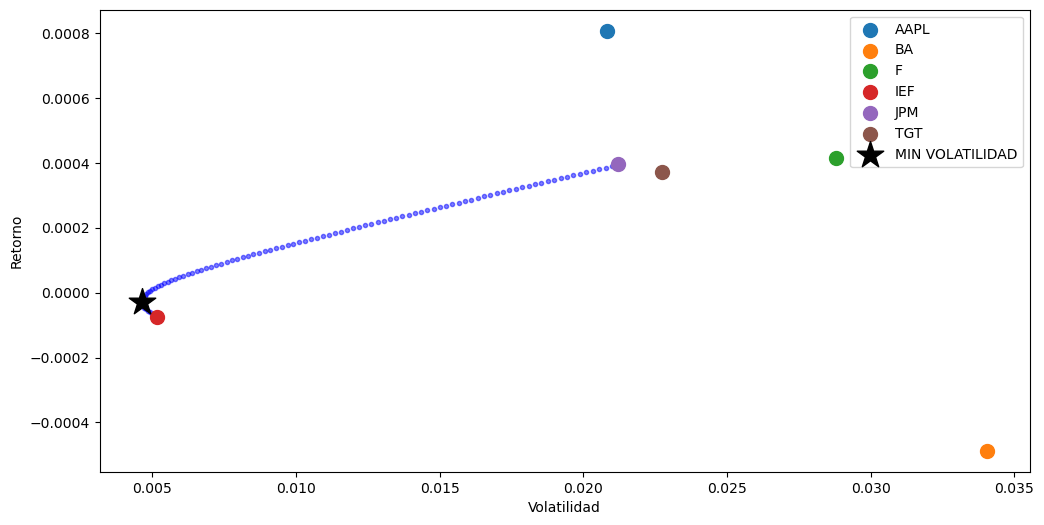

In [73]:
pesos = np.linspace(0, 1, 101)

fig, ax = plt.subplots(figsize=(12, 6))

for w in pesos:
    weights = np.array([w, 1-w])
    ret_cartera = retornos[activos] @ weights
    retw = ret_cartera.mean()
    stdw = ret_cartera.std()
    plt.scatter(stdw, retw, color='blue', marker='.', alpha=0.5)

for a in retornos.columns:
    r = retornos[a].mean()
    std = retornos[a].std()
    plt.scatter(std, r, marker='o', s=100, label=a)
plt.scatter(min_volatilidad, min_retorno, color='black', marker='*', s=400, label="MIN VOLATILIDAD")

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()

**PREGUNTA QUE HAY QUE CONTESTAR PARA SER CORRECTO** 

¿Por qué salen esos dos activos? ¿Por qué no se combina IEF con AAPL que tiene más rentabilidad?


In [74]:
# Por la correlación. Es la pareja con correlación mínima.

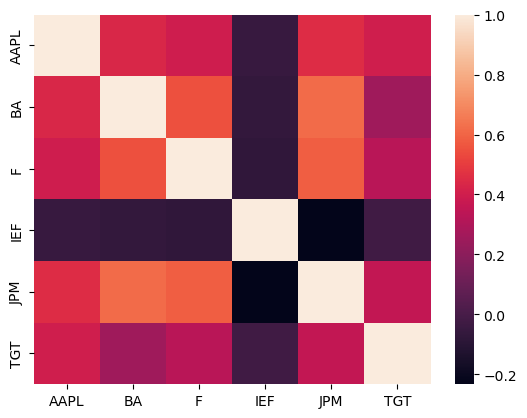

In [76]:
sns.heatmap(retornos.corr())
plt.show()

### OPCION 2

In [77]:
# Buscando los dos activos de mínima correlación.

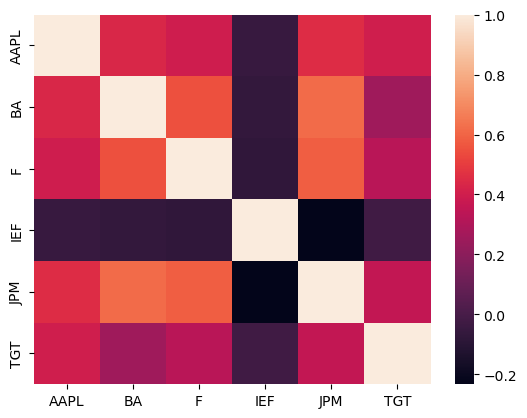

In [78]:
sns.heatmap(retornos.corr())
plt.show()

In [87]:
np.where(retornos.corr() == retornos.corr().min().min())[0]

array([3, 4])

In [90]:
activos = list(retornos.columns[[3, 4]])
activos

['IEF', 'JPM']

In [95]:
# activos = retornos.corr().stack().idxmin()

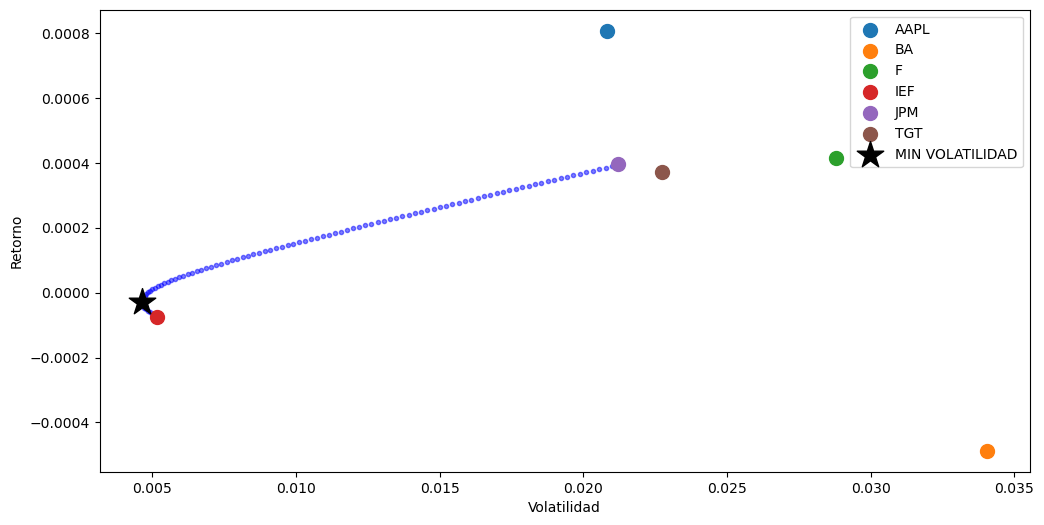

In [96]:
pesos = np.linspace(0, 1, 101)

fig, ax = plt.subplots(figsize=(12, 6))

for w in pesos:
    weights = np.array([w, 1-w])
    ret_cartera = retornos[activos] @ weights
    retw = ret_cartera.mean()
    stdw = ret_cartera.std()
    plt.scatter(stdw, retw, color='blue', marker='.', alpha=0.5)

for a in retornos.columns:
    r = retornos[a].mean()
    std = retornos[a].std()
    plt.scatter(std, r, marker='o', s=100, label=a)
    

ret1 = retornos[activos[0]].mean()
ret2 = retornos[activos[1]].mean()
std1 = retornos[activos[0]].std()
std2 = retornos[activos[1]].std()
rho = retornos.corr().loc[activos[0], activos[1]]
w1 = (std2**2 - rho * std1 * std2) / (std1**2 + std2**2 - 2 * rho * std1 * std2)
w2 = 1 - w1
retorno = w1 * ret1 + w2 * ret2
volatilidad = np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * rho * std1 * std2)
plt.scatter(volatilidad, retorno, color='black', marker='*', s=400, label="MIN VOLATILIDAD")

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()

**PREGUNTA QUE HAY QUE CONTESTAR PARA SER CORRECTO** 

¿Por qué has cogido la pareja de mínima correlación?

In [ ]:
# Porque la correlación mínima nos permite diversificar más los riesgos.